### Задание

Самостоятельно напишите нейронную сеть, которая может стать составной частью системы бота для игры в "Крестики-нолики". Используя подготовленную базу изображений, создайте и обучите нейронную сеть, распознающую две категории изображений: крестики и нолики. Добейтесь точности распознавания более 95% (accuracy)


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import matplotlib.pyplot as plt
import numpy as np
import os

from sklearn.model_selection import train_test_split
from tensorflow.keras import utils
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import image

%matplotlib inline

In [2]:
# Загрузка датасета из облака
import gdown
gdown.download('https://storage.yandexcloud.net/aiueducation/Content/base/l3/hw_pro.zip', None, quiet=True)

'hw_pro.zip'

In [3]:
# Распаковываем архив hw_light.zip в папку hw_light
!unzip -q hw_pro.zip

In [5]:
CLASS_COUNT = 2

In [7]:
# Путь к директории с базой
base_dir = '/content/hw_pro'
# Создание пустого списка для загрузки изображений обучающей выборки
x_train = []
# Создание списка для меток классов
y_train = []
# Задание высоты и ширины загружаемых изображений
img_height = 20
img_width = 20
# Перебор папок в директории базы
for patch in os.listdir(base_dir):
    # Перебор файлов в папках
    for img in os.listdir(base_dir + '/' + patch):
        # Добавление в список изображений текущей картинки
        x_train.append(image.img_to_array(image.load_img(base_dir + '/' + patch + '/' + img,
                                                         target_size=(img_height, img_width),
                                                         color_mode='grayscale')))
        # Добавление в массив меток, соответствующих классам
        if patch == '0':
            y_train.append(0)
        else:
            y_train.append(1)
# Преобразование в numpy-массив загруженных изображений и меток классов
x_train = np.array(x_train)
y_train = np.array(y_train)
# Вывод размерностей
print('Размер массива x_train', x_train.shape)
print('Размер массива y_train', y_train.shape)

Размер массива x_train (102, 20, 20, 1)
Размер массива y_train (102,)


In [8]:
x = x_train.reshape(x_train.shape[0], -1)
x = x.astype('float32') / 255
y = utils.to_categorical(y_train, CLASS_COUNT)

print('Размер массива x_train', x.shape)
print('Размер массива y_train', y.shape)

Размер массива x_train (102, 400)
Размер массива y_train (102, 2)


In [9]:
x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size = 0.1,
                                                    shuffle=True,
                                                    random_state=42)

print('Обучающая выборка изображений', len(x_train))
print('Обучающая выборка меток', len(y_train))
print()
print('Тестовая выборка изображений', len(x_test))
print('Тестовая выборка меток', len(y_test))

Обучающая выборка изображений 91
Обучающая выборка меток 91

Тестовая выборка изображений 11
Тестовая выборка меток 11


In [10]:
model = Sequential()
model.add(Dense(50, input_dim=400, activation = 'linear'))
model.add(Dense(CLASS_COUNT, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(x_train,
          y_train,
          batch_size=10,
          epochs=15,
          validation_split=0.2,
          verbose=1)

Epoch 1/15
8/8 [==============================] - 1s 38ms/step - loss: 1.4043 - accuracy: 0.5556 - val_loss: 1.5287 - val_accuracy: 0.5789
Epoch 2/15
8/8 [==============================] - 0s 9ms/step - loss: 1.4047 - accuracy: 0.4444 - val_loss: 1.0893 - val_accuracy: 0.4211
Epoch 3/15
8/8 [==============================] - 0s 8ms/step - loss: 0.7072 - accuracy: 0.5556 - val_loss: 0.4741 - val_accuracy: 0.7895
Epoch 4/15
8/8 [==============================] - 0s 7ms/step - loss: 0.4842 - accuracy: 0.7778 - val_loss: 0.4310 - val_accuracy: 0.8947
Epoch 5/15
8/8 [==============================] - 0s 9ms/step - loss: 0.3627 - accuracy: 0.8472 - val_loss: 0.3465 - val_accuracy: 0.8421
Epoch 6/15
8/8 [==============================] - 0s 8ms/step - loss: 0.3526 - accuracy: 0.8889 - val_loss: 0.3063 - val_accuracy: 1.0000
Epoch 7/15
8/8 [==============================] - 0s 9ms/step - loss: 0.2966 - accuracy: 0.9306 - val_loss: 0.2931 - val_accuracy: 0.9474
Epoch 8/15
8/8 [=================

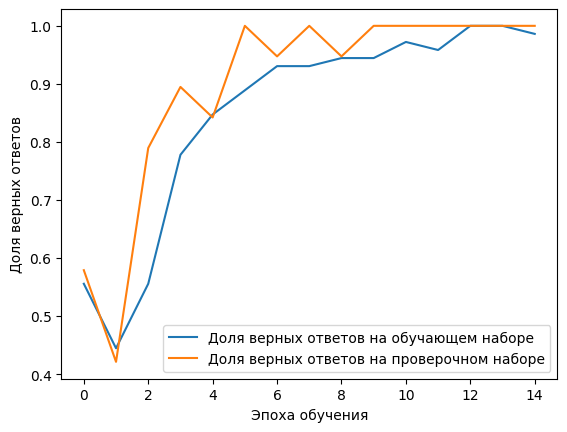

In [11]:
plt.plot(history.history['accuracy'],
         label='Доля верных ответов на обучающем наборе')

plt.plot(history.history['val_accuracy'],
         label='Доля верных ответов на проверочном наборе')

plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')

plt.legend()

plt.show()

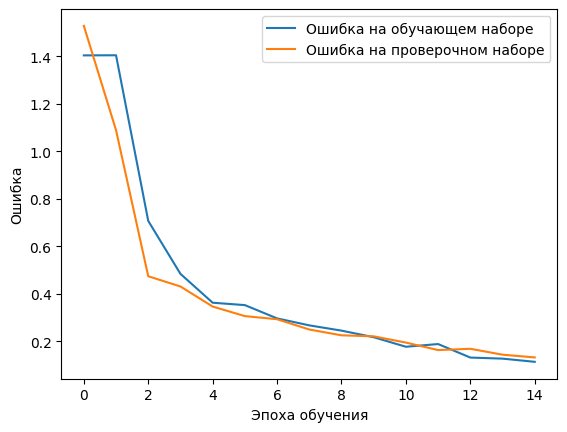

In [12]:
plt.plot(history.history['loss'],
         label='Ошибка на обучающем наборе')

plt.plot(history.history['val_loss'],
         label='Ошибка на проверочном наборе')

plt.xlabel('Эпоха обучения')
plt.ylabel('Ошибка')

plt.legend()

plt.show()

In [13]:
scores = model.evaluate(x_test,
                        y_test,
                        verbose=0
                        )
print('Процент верных ответов на тестовых данных:', round(scores[1],2) * 100, '%')

Процент верных ответов на тестовых данных: 100.0 %
